In [1]:
https://public.tableau.com/views/ESGBook/CO2Emission-Agg?:embed=y&:display_count=n&:origin=viz_share_linkimport numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
# !pip install ydata_profiling
# from ydata_profiling import ProfileReport
# !pip install ipywidgets
# !python.exe -m pip install --upgrade pip

In [6]:
raw=pd.read_csv(r"C:\Users\bhava\Desktop\Technical_test\Technical_test\sample_data_100.csv")

In [7]:
emissions_metrics=pd.read_csv(r"C:\Users\bhava\Desktop\Technical_test\Technical_test\Emissions_metrics_data_dictionary.csv")

In [8]:
# profile_raw_data = ProfileReport(raw, title="Pandas Profiling Report of raw data")
# profile_emissions_metrics = ProfileReport(emissions_metrics, title="Pandas Profiling Report of emissions")

In [9]:
raw=raw.drop("Unnamed: 0",axis=1)

In [10]:
# Check for missing values
missing_values = raw.isnull().sum()

print("Missing values:")
print(missing_values)

Missing values:
isin        0
year        0
em_60000    3
em_60100    8
em_60200    6
em_60300    8
em_60400    7
em_60500    7
em_60600    6
em_60700    4
em_60800    6
em_60900    8
em_61000    6
em_61100    1
em_61200    4
em_61300    5
em_61400    5
em_61500    3
em_61600    3
em_61700    8
em_61800    8
dtype: int64


In [11]:
raw=raw.fillna(0)

In [12]:
raw.describe()
# The statistical metrics are noticeably low at em_60000

,year,em_60000,em_60100,em_60200,em_60300,em_60400,em_60500,em_60600,em_60700,em_60800,em_60900,em_61000,em_61100,em_61200,em_61300,em_61400,em_61500,em_61600,em_61700,em_61800
count,1100.000000,1100.000000,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03,1.100000e+03
mean,2018.000000,348628.958173,1.455460e+08,1.401738e+08,1.423515e+08,1.455120e+08,1.445182e+08,1.457511e+08,1.415055e+08,1.425107e+08,1.405216e+08,1.457797e+08,1.425324e+08,1.508309e+08,1.428982e+08,1.465756e+08,1.443169e+08,1.476106e+08,1.430995e+08,1.392460e+08
std,3.163716,53214.389190,8.329557e+07,8.305252e+07,8.469982e+07,8.506793e+07,8.550178e+07,8.234968e+07,8.429437e+07,8.466858e+07,8.191873e+07,8.371845e+07,8.437221e+07,8.349672e+07,8.251225e+07,8.138863e+07,8.225090e+07,8.188202e+07,8.332013e+07,8.388517e+07
min,2013.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.000000,314184.105051,7.048005e+07,6.879628e+07,6.938948e+07,7.295859e+07,6.770707e+07,7.529001e+07,7.043985e+07,6.740721e+07,7.212442e+07,7.368156e+07,7.094434e+07,8.017278e+07,7.532348e+07,7.760797e+07,7.436668e+07,7.893286e+07,7.231399e+07,6.741598e+07
50%,2018.000000,337123.355259,1.536293e+08,1.390846e+08,1.427988e+08,1.474503e+08,1.473179e+08,1.496418e+08,1.387083e+08,1.445805e+08,1.370858e+08,1.471931e+08,1.407151e+08,1.521126e+08,1.425813e+08,1.477767e+08,1.451477e+08,1.490448e+08,1.420853e+08,1.352066e+08
75%,2021.000000,371661.039601,2.165540e+08,2.122415e+08,2.174749e+08,2.192545e+08,2.177349e+08,2.143268e+08,2.171080e+08,2.168873e+08,2.079661e+08,2.161135e+08,2.187336e+08,2.212364e+08,2.169744e+08,2.143492e+08,2.154991e+08,2.176163e+08,2.141372e+08,2.127030e+08
max,2023.000000,734714.932618,2.882107e+08,2.882606e+08,2.884277e+08,2.878380e+08,2.883993e+08,2.881046e+08,2.879356e+08,2.884101e+08,2.885399e+08,2.881801e+08,2.884535e+08,2.885258e+08,2.884830e+08,2.885234e+08,2.884042e+08,2.885352e+08,2.885118e+08,2.881499e+08


In [13]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   isin      1100 non-null   object 
 1   year      1100 non-null   int64  
 2   em_60000  1100 non-null   float64
 3   em_60100  1100 non-null   float64
 4   em_60200  1100 non-null   float64
 5   em_60300  1100 non-null   float64
 6   em_60400  1100 non-null   float64
 7   em_60500  1100 non-null   float64
 8   em_60600  1100 non-null   float64
 9   em_60700  1100 non-null   float64
 10  em_60800  1100 non-null   float64
 11  em_60900  1100 non-null   float64
 12  em_61000  1100 non-null   float64
 13  em_61100  1100 non-null   float64
 14  em_61200  1100 non-null   float64
 15  em_61300  1100 non-null   float64
 16  em_61400  1100 non-null   float64
 17  em_61500  1100 non-null   float64
 18  em_61600  1100 non-null   float64
 19  em_61700  1100 non-null   float64
 20  em_61800  1100 non-null   floa

In [14]:
emissions_metrics.describe()

,Key,Module,Pillar,Name,Description,Data Type,Unit,Polarity
count,98,98,98,98,98,98,98,98
unique,98,1,1,98,98,2,7,2
top,em_60000,Emissions Plus,E,Scope 1,Scope 1 CO2e emissions,Binary,Disclosed/Not Disclosed,Positive
freq,1,98,98,1,1,73,73,73


In [15]:
emissions_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Key          98 non-null     object
 1   Module       98 non-null     object
 2   Pillar       98 non-null     object
 3   Name         98 non-null     object
 4   Description  98 non-null     object
 5   Data Type    98 non-null     object
 6   Unit         98 non-null     object
 7   Polarity     98 non-null     object
dtypes: object(8)
memory usage: 6.2+ KB


In [16]:
emissions_metrics=emissions_metrics.fillna(0)

In [17]:
raw.columns

Index(['isin', 'year', 'em_60000', 'em_60100', 'em_60200', 'em_60300',
       'em_60400', 'em_60500', 'em_60600', 'em_60700', 'em_60800', 'em_60900',
       'em_61000', 'em_61100', 'em_61200', 'em_61300', 'em_61400', 'em_61500',
       'em_61600', 'em_61700', 'em_61800'],
      dtype='object')

In [18]:
raw.index

RangeIndex(start=0, stop=1100, step=1)

In [19]:
emissions_metrics.columns

Index(['Key', 'Module', 'Pillar', 'Name', 'Description', 'Data Type', 'Unit',
       'Polarity'],
      dtype='object')

In [20]:
emissions_metrics.index

RangeIndex(start=0, stop=98, step=1)

In [21]:
raw.nunique()[:2]

isin    100
year     11
dtype: int64

In [22]:
emissions_metrics.nunique()

Key            98
Module          1
Pillar          1
Name           98
Description    98
Data Type       2
Unit            7
Polarity        2
dtype: int64

In [23]:
emissions_metrics=emissions_metrics.drop(["Module","Pillar"],axis=1)
# we are dropping these trivial columns because they are not much contributing for any insights or hints as they are all of same value in the original file.

In [24]:
raw_keys=emissions_metrics[:len(raw.columns[2:])]

In [25]:
raw_keys['Name']=raw_keys['Name'].apply(lambda x: x[:7])

In [26]:
raw_keys['Pollutant'] = raw_keys['Description'].apply(lambda x: 'CO2e emissions' if 'CO2e emissions' in x else x)

In [27]:
raw_keys['Causes of emissions']=raw_keys['Description'].apply(lambda x: x[23:])

In [28]:
segregate=raw_keys.groupby(['Name','Key']).apply(lambda x: x)

In [29]:
segregate=segregate.droplevel(level=None)


In [30]:
cleaned_multiindex=segregate.drop(segregate.index.names,axis=1)

In [31]:
def clean(x):
    if x is '':
        return 'CO2'
    else:
        return x.replace("– ","")

In [32]:
cleaned_multiindex['Causes of emissions']=cleaned_multiindex['Causes of emissions'].apply(clean)

In [33]:
cleaned_multiindex.drop("Description", axis=1)

Data Type                 Unit  Polarity       Pollutant   
Name    Key                                                                   
Scope 1 em_60000  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions  \
Scope 2 em_60100  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60200  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
Scope 3 em_60300  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60400  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60500  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60600  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60700  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60800  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_60900  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61000  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61100  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61200  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61300  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61400  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61500  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61600  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61700  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   
        em_61800  Continuous  number (tCO2e)/NULL  Negative  CO2e emissions   

                                         Causes of emissions  
Name    Key                                                   
Scope 1 em_60000                                         CO2  
Scope 2 em_60100      calculated using location based method  
        em_60200        calculated using market based method  
Scope 3 em_60300                                         CO2  
        em_60400                purchased goods and services  
        em_60500                               Capital goods  
        em_60600          fuel and energy related activities  
        em_60700    upstream transportation and distribution  
        em_60800                                       waste  
        em_60900                             business travel  
        em_61000                          employee commuting  
        em_61100                      upstream leased assets  
        em_61200  downstream transportation and distribution  
        em_61300                 processing of sold products  
        em_61400                        use of sold products  
        em_61500      end-of life treatment of sold products  
        em_61600                    downstream leased assets  
        em_61700                                  franchises  
        em_61800                                 investments

In [34]:
for i in emissions_metrics.Name:
    print(i)

Scope 1
Scope 2 (location based)
Scope 2 (market based)
Scope 3 (total)
Scope 3 (cat 1)
Scope 3 (cat 2)
Scope 3 (cat 3)
Scope 3 (cat 4)
Scope 3 (cat 5)
Scope 3 (cat 6)
Scope 3 (cat 7)
Scope 3 (cat 8)
Scope 3 (cat 9)
Scope 3 (cat 10)
Scope 3 (cat 11)
Scope 3 (cat 12)
Scope 3 (cat 13)
Scope 3 (cat 14)
Scope 3 (cat 15)
CH₄ Emissions [Methane GHG]
CO₂ Emissions [Carbon Dioxide GHG]
HFC Emissions [Fluoroform GHG] 
N₂O Emissions [Nitrous Oxide GHG] 
PFC Emissions [Perfluorocarbons GHG]
SF₆ Emissions [Sulfur Hexafluoride GHG]
Board oversight of climate risks and opportunities
Board oversight of climate risks and opportunities 1
Board oversight of climate risks and opportunities 2
Board oversight of climate risks and opportunities 3
Board oversight of climate risks and opportunities 4
Board oversight of climate risks and opportunities 5
Board oversight of climate risks and opportunities 6
Board oversight of climate risks and opportunities 7
Management role in climate risks and opportunities
Ma

In [35]:
raw.shape

(1100, 21)

In [36]:
decade=raw.drop('year',axis=1) # A timeline of 2013 to 2023 for each company

In [37]:
ISIN=decade.groupby("isin").sum()

In [38]:
ISIN

,em_60000,em_60100,em_60200,em_60300,em_60400,em_60500,em_60600,em_60700,em_60800,em_60900,em_61000,em_61100,em_61200,em_61300,em_61400,em_61500,em_61600,em_61700,em_61800
isin,,,,,,,,,,,,,,,,,,,
AU000000BKW4,4.620558e+06,2.039837e+09,1.243652e+09,1.372055e+09,1.427030e+09,1.710520e+09,1.509444e+09,1.265222e+09,1.230498e+09,1.421085e+09,1.524205e+09,1.432013e+09,1.667881e+09,1.683780e+09,1.469656e+09,1.570480e+09,1.828273e+09,1.531318e+09,1.391491e+09
AU000000CPU5,3.907307e+06,1.152824e+09,1.601092e+09,1.484283e+09,1.826404e+09,1.155614e+09,1.258583e+09,1.392205e+09,1.379869e+09,1.544378e+09,1.645432e+09,1.720007e+09,1.297475e+09,1.693658e+09,1.517661e+09,1.547577e+09,1.235481e+09,1.368085e+09,1.650371e+09
BMG540501027,3.689904e+06,1.890013e+09,1.656507e+09,1.759014e+09,1.925427e+09,2.040850e+09,1.235642e+09,1.135149e+09,1.604737e+09,1.427696e+09,1.306313e+09,1.085229e+09,1.429888e+09,1.599005e+09,1.554316e+09,1.881330e+09,1.648554e+09,1.572447e+09,1.634798e+09
BMG578481068,3.721530e+06,1.605802e+09,1.663373e+09,1.335776e+09,1.702964e+09,1.476086e+09,1.613255e+09,1.357709e+09,1.839244e+09,1.275045e+09,1.608850e+09,1.255675e+09,1.824225e+09,1.616964e+09,1.906643e+09,1.739674e+09,1.234486e+09,1.354964e+09,1.648706e+09
BMG8086V1467,3.471386e+06,1.978718e+09,1.558587e+09,1.318926e+09,1.528021e+09,1.145730e+09,1.685733e+09,1.554207e+09,2.022079e+09,1.764026e+09,1.369089e+09,1.014461e+09,2.063781e+09,1.336202e+09,1.301665e+09,1.356472e+09,1.486086e+09,1.481802e+09,1.712824e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US92346J1088,3.858707e+06,1.947511e+09,1.799598e+09,1.686300e+09,1.454983e+09,8.463114e+08,1.240778e+09,1.689786e+09,1.498645e+09,1.670063e+09,1.155332e+09,1.291730e+09,1.544236e+09,1.539732e+09,1.695351e+09,1.413791e+09,1.497240e+09,1.268122e+09,1.744625e+09
US9291601097,3.466049e+06,1.497536e+09,1.685658e+09,1.873978e+09,1.665656e+09,1.491209e+09,1.668274e+09,1.442598e+09,1.279902e+09,1.000298e+09,1.025793e+09,1.739208e+09,1.789797e+09,1.645229e+09,1.243632e+09,1.343136e+09,1.356399e+09,1.747302e+09,1.337019e+09
US95040Q1040,3.378294e+06,1.447131e+09,1.446503e+09,1.461421e+09,1.725408e+09,1.613099e+09,8.121919e+08,1.852803e+09,1.641063e+09,1.686340e+09,1.252251e+09,1.486679e+09,1.417072e+09,2.044606e+09,1.822678e+09,1.423973e+09,1.636710e+09,2.192486e+09,1.937575e+09


In [39]:
# ISIN.to_excel(r"C:\Users\bhava\Desktop\Technical_test\Technical_test\ISIN.xlsx")

In [40]:
df=pd.DataFrame(index=ISIN.index,columns=['Max','Min'])

In [41]:
df

,Max,Min
isin,,
AU000000BKW4,NaN,NaN
AU000000CPU5,NaN,NaN
BMG540501027,NaN,NaN
BMG578481068,NaN,NaN
BMG8086V1467,NaN,NaN
...,...,...
US92346J1088,NaN,NaN
US9291601097,NaN,NaN
US95040Q1040,NaN,NaN


In [42]:
df['Max']=ISIN.apply(lambda x: x.max(),axis=1)

In [43]:
df['Min']=ISIN.apply(lambda x: x.min(),axis=1)

In [44]:
max_emissions=df['Max'].to_frame() #Let our focus be on companies with high emissions.

In [45]:
Key=[]
for i in max_emissions.index:
    Key.append((ISIN.loc[i]==max_emissions.loc[i][0]).idxmax())

In [46]:
df['Max Key']= pd.Series(Key, index=df.index, name='Max Keys')

In [47]:
df.sort_values(by="Max",ascending=False)
# As we can clearly see the Company with ISIN # ZAE000180865 a pose high risk for climate.

,Max,Min,Max Key
isin,,,
ZAE000180865,2.525714e+09,3.935983e+06,em_60500
NL0006237562,2.384881e+09,3.425501e+06,em_60400
US75513E1010,2.383827e+09,3.558535e+06,em_60800
JP3125800007,2.364380e+09,3.584966e+06,em_60500
CNE100003PM2,2.363908e+09,3.879626e+06,em_61200
...,...,...,...
BRFLRYACNOR5,1.857016e+09,4.198364e+06,em_61500
TW0009933002,1.849956e+09,3.800060e+06,em_61100
MXP225611567,1.849339e+09,3.913767e+06,em_61800


This table clearly visualizes the high and low emissions of each company in their lifetime of 10 years i.e., from 2013 to 2023

In [48]:
Min_Max=df[['Max','Min']]

# Find the companies with the highest and lowest emitters with desired no.of rows
highest_emitters = Min_Max.nlargest(10, 'Max')['Max']
lowest_emitters = Min_Max.nsmallest(10, 'Min')['Min']

print("Highest Emitters:")
print(highest_emitters)
print("\n")
print("Lowest Emitters:")
print(lowest_emitters)

Highest Emitters:
isin
ZAE000180865    2.525714e+09
NL0006237562    2.384881e+09
US75513E1010    2.383827e+09
JP3125800007    2.364380e+09
CNE100003PM2    2.363908e+09
SG1R95002270    2.341808e+09
KYG2121R1039    2.339713e+09
CA45868C1095    2.331722e+09
MYL2089OO000    2.327713e+09
MA0000012445    2.313656e+09
Name: Max, dtype: float64


Lowest Emitters:
isin
CNE1000031N8    3.233697e+06
US3696043013    3.286325e+06
US95040Q1040    3.378294e+06
JP3197650009    3.386161e+06
NL0006237562    3.425501e+06
US98983L1089    3.439188e+06
JP3761600000    3.451370e+06
INE208A01029    3.457721e+06
US9291601097    3.466049e+06
BMG8086V1467    3.471386e+06
Name: Min, dtype: float64


In [49]:
df.loc['ZAE000180865']

Max          2525713952.0
Min        3935982.920345
Max Key          em_60500
Name: ZAE000180865, dtype: object

In [50]:
df.aggregate({'Max': 'mean'})

Max    2.102215e+09
dtype: float64

In [51]:
df['Max'].max() # Reassuring ZAE000180865 is the highest value: confirmed.

2525713952.0

In [52]:
# Check for outliers
outliers = Min_Max[(Min_Max > Min_Max.mean() + 3 * Min_Max.std()) | (Min_Max < Min_Max.mean() - 3 * Min_Max.std())]

print("Outliers:")
print(outliers)

Outliers:
              Max  Min
isin                  
AU000000BKW4  NaN  NaN
AU000000CPU5  NaN  NaN
BMG540501027  NaN  NaN
BMG578481068  NaN  NaN
BMG8086V1467  NaN  NaN
...           ...  ...
US92346J1088  NaN  NaN
US9291601097  NaN  NaN
US95040Q1040  NaN  NaN
US98983L1089  NaN  NaN
ZAE000180865  NaN  NaN

[100 rows x 2 columns]


In [53]:
df['Max Key'].value_counts() 
# It is evident that Multiple companies share same Keys varying number of times.

Max Key
em_60500    10
em_61000     9
em_60100     8
em_61100     8
em_61200     7
em_60600     7
em_61700     6
em_61400     6
em_60200     5
em_60800     5
em_60300     5
em_60400     5
em_60900     4
em_61800     4
em_61600     4
em_60700     3
em_61500     3
em_61300     1
Name: count, dtype: int64

In [54]:
# df.to_excel(r"C:\Users\bhava\Desktop\Technical_test\Technical_test\Max_keys_sum.xlsx")

In [55]:
# This shows the highest recordings of emission for each company.
highestRecorded=dict()
for i in df.index:
    highestRecorded[i]=ISIN.loc[i].max()

In [56]:
#You can also find a plot for the same in the third sheet of the below visualization.
highestRecorded

{'AU000000BKW4': 2039837479.0,
 'AU000000CPU5': 1826403935.0,
 'BMG540501027': 2040849621.0,
 'BMG578481068': 1906643172.0,
 'BMG8086V1467': 2063781306.0,
 'BRFLRYACNOR5': 1857015716.0,
 'CA45868C1095': 2331721885.0,
 'CH1176493729': 2060750384.0,
 'CL0002841873': 2167254982.0,
 'CNE000000FH0': 1973657768.0,
 'CNE000001DX0': 2016498407.0,
 'CNE000001KP1': 1907729966.0,
 'CNE100000BQ9': 2242507323.0,
 'CNE100000Q35': 2212120973.0,
 'CNE100001WB5': 1958829042.0,
 'CNE1000031N8': 2174261401.0,
 'CNE100003PM2': 2363908408.0,
 'DE0005785802': 2303689629.0,
 'DK0060907293': 2197054885.0,
 'ES0130960018': 1981211202.0,
 'GB00B19Z1432': 2034128755.0,
 'GB00BNC5T391': 2101339541.0,
 'HK0293001514': 2198521153.0,
 'IE0033024807': 1920551277.0,
 'IE00B1RR8406': 2111452695.0,
 'INE208A01029': 2079824028.0,
 'INE238A01034': 2057501449.0,
 'INE397D01024': 2132611943.0,
 'JO1302311013': 2080620330.0,
 'JP3100640006': 2142935785.0,
 'JP3125800007': 2364379723.0,
 'JP3143600009': 2093952871.0,
 'JP3197

In [57]:
# pd.Series(highestRecorded).to_excel(r"C:\Users\bhava\Desktop\Technical_test\Technical_test\highRecords.xlsx")

# PLEASE EXECUTE THIS CELL MANUALLY 👇🏽👇🏽👇🏽

In [58]:
%%html
<iframe src="https://public.tableau.com/views/ESGBook/CO2Emission-Agg?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link" width="1000" height="600"></iframe>

"""
In the first two sheets, each bar is ordered Descending from the bottom which means for each bar the last block holds the largest value.
"""

# !!! Please notice that this viz have a total of 3 tabs or sheets.

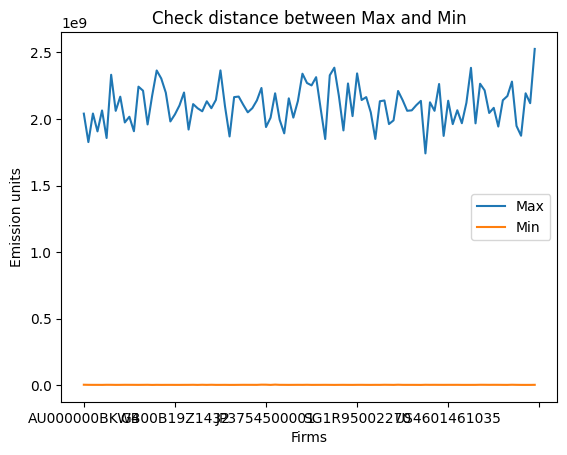

In [59]:
# Create a bar chart of the average emissions for each industry
Min_Max.plot.line()
plt.xlabel('Firms')
plt.ylabel('Emission units')
plt.title('Check distance between Max and Min')
plt.show()

# - The End -